# Módulo Visualização de Dados:

Leia o arquivo ecommerce_preparados.csv’ dentro de um dataframe  

Faça uma análise detalhada dos dados, descubra quais dados gostaria de destacar e crie os seguintes gráficos:


*   1 Gráfico de dispersão
*   1 Mapa de calor
*   1 Gráfico de barra
*   1 Gráfico de pizza
*   1 Gráfico de densidade

Adicione títulos nos gráficos e nos eixos para ficar claro os objetivos dos gráficos.

Fiquem a vontade para escolher a biblioteca que quiserem, não esqueçam de comentar os códigos.

Essa atividade é um pouco diferente, vocês terão que construir os códigos nesse arquivo e enviar ou o arquivo ou o link do github com o arquivo publicado para os tutores.

   Unnamed: 0                                                        Título  Nota  N_Avaliações  Desconto                            Marca   Material      Gênero        Temporada                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Review1                                                                                                                                                                                                                                                                                                                                        

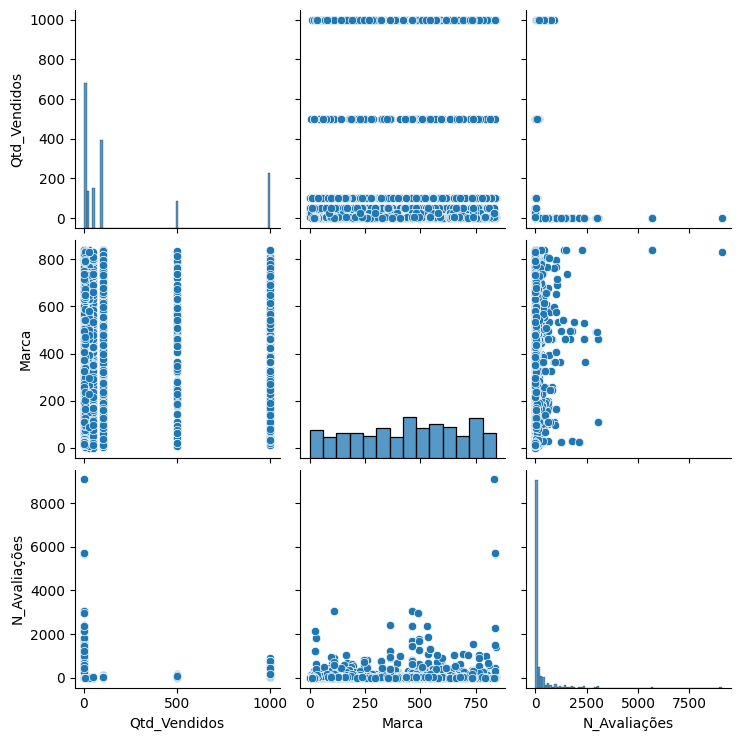

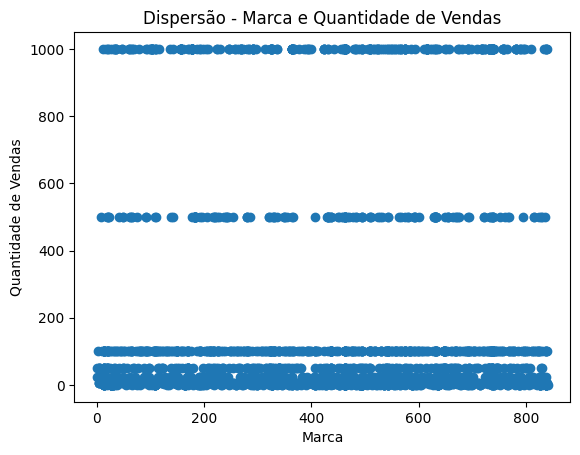

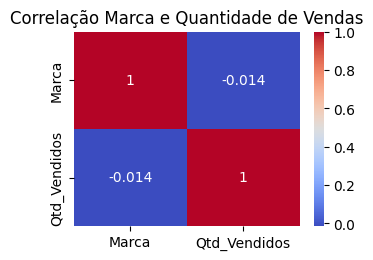

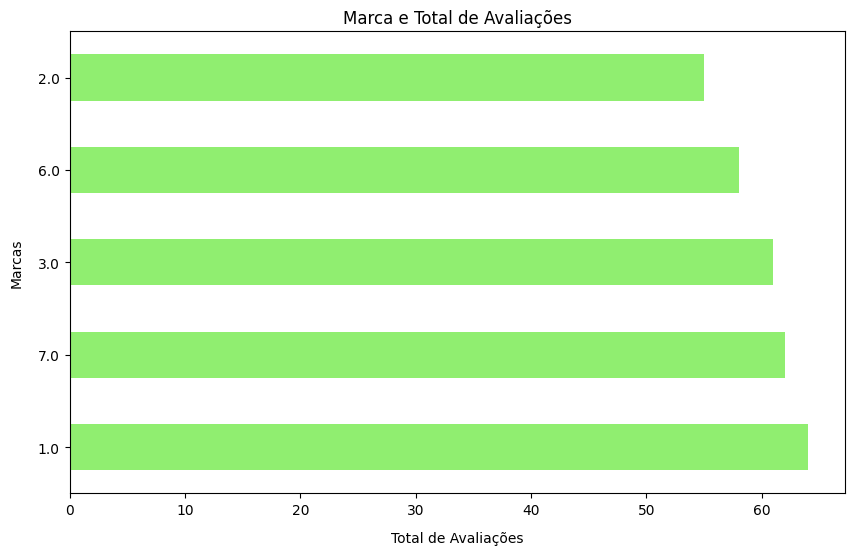

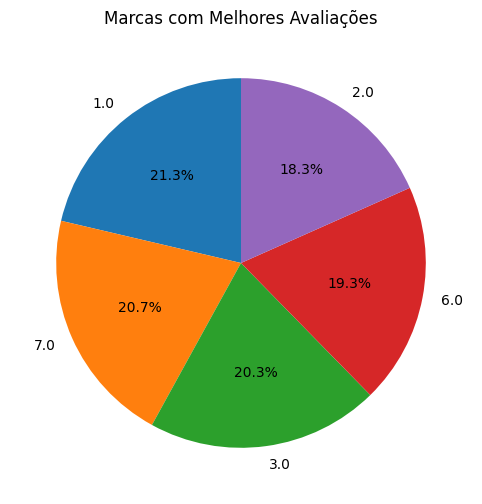

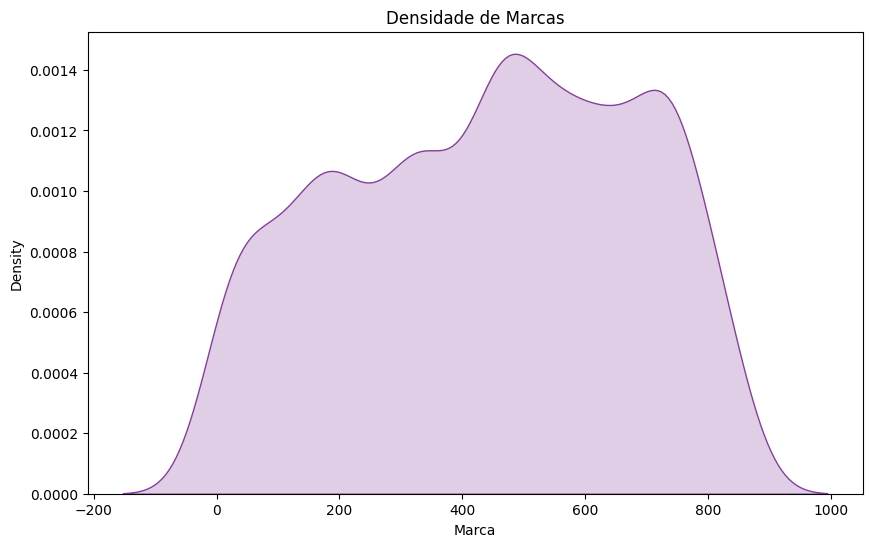

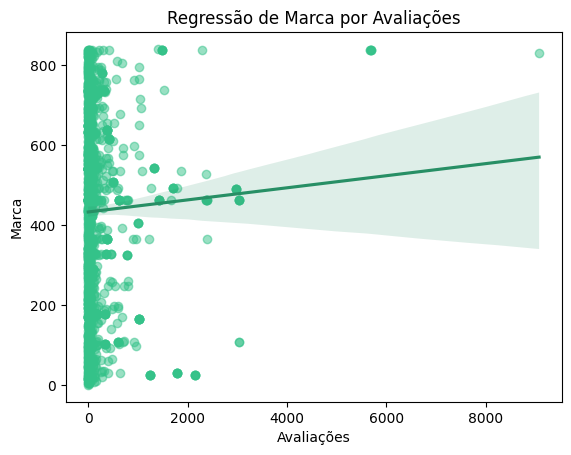

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv('ecommerce_preparados.csv')
print(df.head().to_string())

# Tratamento de dados
print(df.dtypes)
df['Qtd_Vendidos'] = pd.to_numeric(df['Qtd_Vendidos'], errors='coerce')  # Transformar a coluna em númerico
df['Qtd_Vendidos'] = df['Qtd_Vendidos'].fillna(0)  # Substituir NaN por 0 (zero)
df['Marca'] = df['Marca'].astype('category').cat.codes  # Converte marcas para códigos

# Gráfico de Pairplot - Dispersão e Histograma
sns.pairplot(df[['Qtd_Vendidos', 'Marca', 'N_Avaliações']])
plt.show()  # Exibe o Gráfico

# Gráfico de Dispersão entre Marca e Quantidade de Vendas
plt.scatter(df['Marca'], df['Qtd_Vendidos'])
plt.title('Dispersão - Marca e Quantidade de Vendas')
plt.xlabel('Marca')
plt.ylabel('Quantidade de Vendas')
plt.show()  # Exibe o Gráfico

# Mapa de Calor entre Marca e Quantidade de Vendas
corr = df[['Marca', 'Qtd_Vendidos']].corr()
plt.subplot(2, 2, 3)  # 1 Linha, 2 Colunas, 3º Gráfico
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação Marca e Quantidade de Vendas')

plt.tight_layout()  # Ajustar espaçamentos
plt.show()  # Exibe o Gráfico

# Gráfico de Barras Correlacionando Marca e Total de Avaliações
plt.figure(figsize=(10, 6))
top_marcas = df['Marca'].value_counts().head(5).sort_values(ascending=True)  # Ordem crescente para melhor leitura de top 5 Marcas
df['N_Avaliações'].value_counts().head(5).plot(kind='barh', color='#90ee70')  # Top 5 Avaliações
plt.title('Marca e Total de Avaliações')
plt.xlabel('Total de Avaliações', fontsize=10, labelpad=10)
plt.ylabel('Marcas', fontsize=10, labelpad=10)
plt.xticks(rotation=0)
plt.show()  # Exibe o Gráfico

x = df['N_Avaliações'].value_counts().head(5).index
y = df['N_Avaliações'].value_counts().head(5).values

# Gráfico de pizza
plt.figure(figsize=(10, 6))
plt.pie(y, labels=x, autopct='%.1f%%', startangle=90)  # Porcentagem para Marcas com melhores Avaliações
plt.title('Marcas com Melhores Avaliações')
plt.show()  # Exibe o Gráfico

# Gráfico de Densidade
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Marca'], fill=True, color='#863e9c')
plt.title('Densidade de Marcas')
plt.xlabel('Marca')
plt.show()  # Exibe o Gráfico

# Gráfico de Regressão
sns.regplot(x='N_Avaliações', y='Marca', data=df, color='#278f65', scatter_kws={'alpha': 0.5, 'color':  '#34c289'})
plt.title('Regressão de Marca por Avaliações')
plt.xlabel('Avaliações')
plt.ylabel('Marca')
plt.show()